In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import calendar
import time
start_time = dt.datetime.now()
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir("/content/drive/MyDrive/DSO562")

In [ ]:
#import data
data = pd.read_csv('card transactions.csv')
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#drop NA columns
data.dropna(how='all',axis=1,inplace=True)

#convert Data to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
#remove Amount outlier
data = data[data['Amount'] < 3000000]
data.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96752.000000,9.675200e+04,92097.000000,96752.000000,96752.000000
mean,48376.955164,5.142202e+09,44706.596740,395.828277,0.010946
std,27930.470494,5.567111e+04,28369.537945,831.879316,0.104047
min,1.000000,5.142110e+09,1.000000,0.010000,0.000000
25%,24188.750000,5.142152e+09,20855.000000,33.480000,0.000000
50%,48376.500000,5.142196e+09,38118.000000,137.975000,0.000000
75%,72565.250000,5.142246e+09,63103.000000,428.200000,0.000000
max,96753.000000,5.142847e+09,99999.000000,47900.000000,1.000000


In [ ]:
#only include P values for Purchases
data = data[data['Transtype'] == 'P']
data.describe(include='all')

<ipython-input-66-3a93552e9ece>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96397.000000,9.639700e+04,96397,93199,96397,95377,92097.000000,96397,96397.000000,96397.000000
unique,NaN,NaN,365,13090,12966,59,NaN,1,NaN,NaN
top,NaN,NaN,2010-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96397,NaN,NaN
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48365.481820,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,395.858494,0.010986
std,27945.003883,5.565825e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,832.330197,0.104236
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,0.010000,0.000000
25%,24154.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,33.460000,0.000000


In [ ]:
#check NA values
data.isna().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3198
Merch description       0
Merch state          1020
Merch zip            4300
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [ ]:
#fill NA values in Merchnum
merchdes_merchnum = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
  if merchdes not in merchdes_merchnum:
    merchdes_merchnum[merchdes] = data.loc[index,'Merchnum']

#fill in by mapping with Merch description
data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))

#assign unknown for adjustments transactions
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT','unknown')
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT','unknown')

In [ ]:
#fill in Merch State

#dict for mapping
zip_state = {}
for index, zip5 in data[data['Merch zip'].notnull()]['Merch zip'].items():
  if zip5 not in zip_state:
    zip_state[zip5] = data.loc[index, 'Merch state']

zip_state['00926'] = 'PR'
zip_state['00929'] = 'PR'
zip_state['00934'] = 'PR'
zip_state['00902'] = 'PR'
zip_state['00738'] = 'PR'
zip_state['90805'] = 'CA'
zip_state['76302'] = 'TX'
zip_state['00914'] = 'PR'
zip_state['95461'] = 'CA'
zip_state['00680'] = 'PR'
zip_state['00623'] = 'PR'
zip_state['00726'] = 'PR'
zip_state['00936'] = 'PR'
zip_state['12108'] = 'NY'
zip_state['00791'] = 'PR'
zip_state['00907'] = 'PR'
zip_state['00922'] = 'PR'
zip_state['00920'] = 'PR'
zip_state['00801'] = 'VI'
zip_state['31040'] = 'GA'
zip_state['41160'] = 'KY'
zip_state['00681'] = 'PR'

merchnum_state = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_state:
      merchnum_state[merchnum] = data.loc[index, 'Merch state']

merchdes_state = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_state:
      merchdes_state[merchdes] = data.loc[index, 'Merch state']


In [ ]:
#fill in by mapping with zip, merchnum and merch description
data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_state))
data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
data['Merch state'] = data['Merch state'].fillna(data['Merch description'].map(merchdes_state))

#assign unknown for adjustment transactions
data['Merch state'] = data['Merch state'].mask(data['Merch state'] == 'RETAIL CREDIT ADJUSTMENT','unknown')
data['Merch state'] = data['Merch state'].mask(data['Merch state'] == 'RETAIL CREDIT ADJUSTMENT','unknown')

In [ ]:
#fill in Merch zip

merchnum_zip = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_zip:
      merchnum_zip[merchnum] = data.loc[index, 'Merch zip']

merchdes_zip = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_zip:
      merchdes_zip[merchdes] = data.loc[index, 'Merch zip']

#fill in by mapping with merchnum and merch description
data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))

#assign unknown for adjustment transactions
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT','unknown')
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT','unknown')

#fill in the rest with unknown
data = data.fillna('unknown')

In [ ]:
#confirm all NA values have been filled
data.isna().sum()

Recnum               0
Cardnum              0
Date                 0
Merchnum             0
Merch description    0
Merch state          0
Merch zip            0
Transtype            0
Amount               0
Fraud                0
dtype: int64

In [ ]:
data.describe(include='all')

<ipython-input-73-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96397.000000,9.639700e+04,96397,96397,96397,96397,96397.0,96397,96397.000000,96397.000000
unique,NaN,NaN,365,13091,12966,60,4568.0,1,NaN,NaN
top,NaN,NaN,2010-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,38118.0,P,NaN,NaN
freq,NaN,NaN,684,9310,1688,12038,11868.0,96397,NaN,NaN
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48365.481820,5.142202e+09,NaN,NaN,NaN,NaN,NaN,NaN,395.858494,0.010986
std,27945.003883,5.565825e+04,NaN,NaN,NaN,NaN,NaN,NaN,832.330197,0.104236
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,0.000000
25%,24154.000000,5.142152e+09,NaN,NaN,NaN,NaN,NaN,NaN,33.460000,0.000000


In [ ]:
#create csv of clean data
data.to_csv('data clean.csv',index=False)

In [ ]:
#import clean data file

data = pd.read_csv('data clean.csv',converters = {'Merchnum': lambda x:str(x),'Cardnum':lambda x:str(x)})
data.shape

(96397, 10)

In [ ]:
#figure out OOT data to get rid of

In [ ]:
#create Benford's Law variables
#drop Fedex and create score for first digit
bf = data.copy()
bf['amount_100'] = (bf['Amount'] * 100).astype(str)
bf['first_digit'] = bf['amount_100'].str[0]
dropfedex = bf[bf['Merch description'].str.contains('FEDEX')]
droplist = dropfedex.index.tolist()
bf1 = bf.drop(droplist)
bf1['bin'] = bf1['first_digit'].apply(lambda x: 'low' if x == '1' else ('low' if x == '2' else 'high'))

In [ ]:
card_bf = bf1.groupby(['Cardnum','bin']).agg({'bin': ['count']}).reset_index()
card_bf.columns = ['Cardnum', 'bin', 'count']
card_bf = card_bf.pivot_table(index='Cardnum',columns='bin',values='count',aggfunc='sum').reset_index()
card_bf.columns=['Cardnum','n_high','n_low']
card_bf = card_bf.fillna(1)

In [ ]:
#calculate R, 1/r, U, n, t, U_smoothed
c=3
n_mid=15
card_bf['R'] = (1.096 * card_bf['n_low']/card_bf['n_high'])
card_bf['1/R'] = (1/card_bf['R'])
card_bf['U'] = list(map(lambda x, y : max(x,y),card_bf['R'],card_bf['1/R']))
card_bf['n'] = card_bf['n_high'] + card_bf['n_low']
card_bf['t'] = ((card_bf['n']-n_mid)/c)
card_bf['U_smoothed'] = list(map(lambda x, y : (1 + (x-1)/(1+math.exp(-y))),card_bf['U'],card_bf['t']))
card_bf['U_smoothed'] = card_bf['U_smoothed']

In [ ]:
merch_bf = bf1.groupby(['Merchnum','bin']).agg({'bin': ['count']}).reset_index()
merch_bf.columns = ['Merchnum', 'bin', 'count']
merch_bf = merch_bf.pivot_table(index='Merchnum',columns='bin',values='count',aggfunc='sum').reset_index()
merch_bf.columns=['Merchnum','n_high','n_low']
merch_bf = merch_bf.fillna(1)

In [ ]:
#calculate R, 1/r, U, n, t, U_smoothed
merch_bf['R'] = (1.096 * merch_bf['n_low']/merch_bf['n_high'])
merch_bf['1/R'] = (1/merch_bf['R'])
merch_bf['U'] = list(map(lambda x, y : max(x,y),merch_bf['R'],merch_bf['1/R']))
merch_bf['n'] = merch_bf['n_high'] + merch_bf['n_low']
merch_bf['t'] = ((merch_bf['n']-n_mid)/c)
merch_bf['U_smoothed'] = list(map(lambda x, y : (1 + (x-1)/(1+math.exp(-y))),merch_bf['U'],merch_bf['t']))
merch_bf['U_smoothed'] = merch_bf['U_smoothed']

In [ ]:
card_bf.set_index('Cardnum',inplace = True)
card_Ustar = pd.DataFrame(card_bf['U_smoothed'])
card_Ustar.sort_values(['U_smoothed'], ascending = False).head(3)

,U_smoothed
Cardnum,
5142253356,13.371199
5142299705,9.027976
5142197563,8.150852


In [ ]:
merch_bf.set_index('Merchnum',inplace = True)
merch_Ustar = pd.DataFrame(merch_bf['U_smoothed'])
merch_Ustar.sort_values(['U_smoothed'], ascending = False).head(3)

,U_smoothed
Merchnum,
991808369338,165.145985
8078200641472,64.663981
308904389335,48.357557


In [ ]:
#add Benford's Law variables to dataset
data = data.merge(card_Ustar, how = 'left', left_on='Cardnum',right_on=card_Ustar.index)
data = data.rename(columns={'U_smoothed' : 'U*_cardnum'})
data = data.merge(merch_Ustar, how = 'left', left_on='Merchnum',right_on=merch_Ustar.index)
data = data.rename(columns={'U_smoothed' : 'U*_merchnum'})

In [ ]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,U*_cardnum,U*_merchnum
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,2.178008,NaN
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,1.604857,1.001244
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,2.368143,1.025818
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,1.044105,NaN
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,2.178008,NaN


In [ ]:
data.shape

(96397, 12)

In [ ]:
data.isna().sum()

Recnum                   0
Cardnum                  0
Date                     0
Merchnum                 0
Merch description        0
Merch state              0
Merch zip                0
Transtype                0
Amount                   0
Fraud                    0
U*_cardnum              72
U*_merchnum          11775
dtype: int64

In [ ]:
#fill in NA values in the Benford's Law variables with 1, which indicates no issues
data = data.fillna(1)

In [ ]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,U*_cardnum,U*_merchnum
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,2.178008,1.000000
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,1.604857,1.001244
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,2.368143,1.025818
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,1.044105,1.000000
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,2.178008,1.000000


In [ ]:
data.dtypes

Recnum                 int64
Cardnum               object
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip             object
Transtype             object
Amount               float64
Fraud                  int64
U*_cardnum           float64
U*_merchnum          float64
dtype: object

In [ ]:
#convert Data to datetime again
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
#figure out indexes to remove OOT data
data.index[data.Date > '2010-11-01'] #84161

Int64Index([84161, 84162, 84163, 84164, 84165, 84166, 84167, 84168, 84169,
            84170,
            ...
            96387, 96388, 96389, 96390, 96391, 96392, 96393, 96394, 96395,
            96396],
           dtype='int64', length=12236)

In [ ]:
data.index[data.Date > '2010-01-15'] #3477

Int64Index([ 3477,  3478,  3479,  3480,  3481,  3482,  3483,  3484,  3485,
             3486,
            ...
            96387, 96388, 96389, 96390, 96391, 96392, 96393, 96394, 96395,
            96396],
           dtype='int64', length=92920)

In [ ]:
#create target encoded day of the week variable
data['Dow'] = data.Date.apply(lambda x: calendar.day_name[x.weekday()])

In [ ]:
#exclude OOT for target encoding variables
train_test = data[data.Date < '2010-11-01']
c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()
y_dow = train_test.groupby('Dow')['Fraud'].mean()
num = train_test.groupby('Dow').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num - nmid)/c))
data['Dow_Risk'] = data.Dow.map(y_dow_smooth)

In [ ]:
y_dow = y_dow.reset_index()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y_dow['Dow'] = pd.Categorical(y_dow['Dow'], categories=cats, ordered=True)
y_dow = y_dow.sort_values('Dow')
y_dow = y_dow.set_index('Dow')

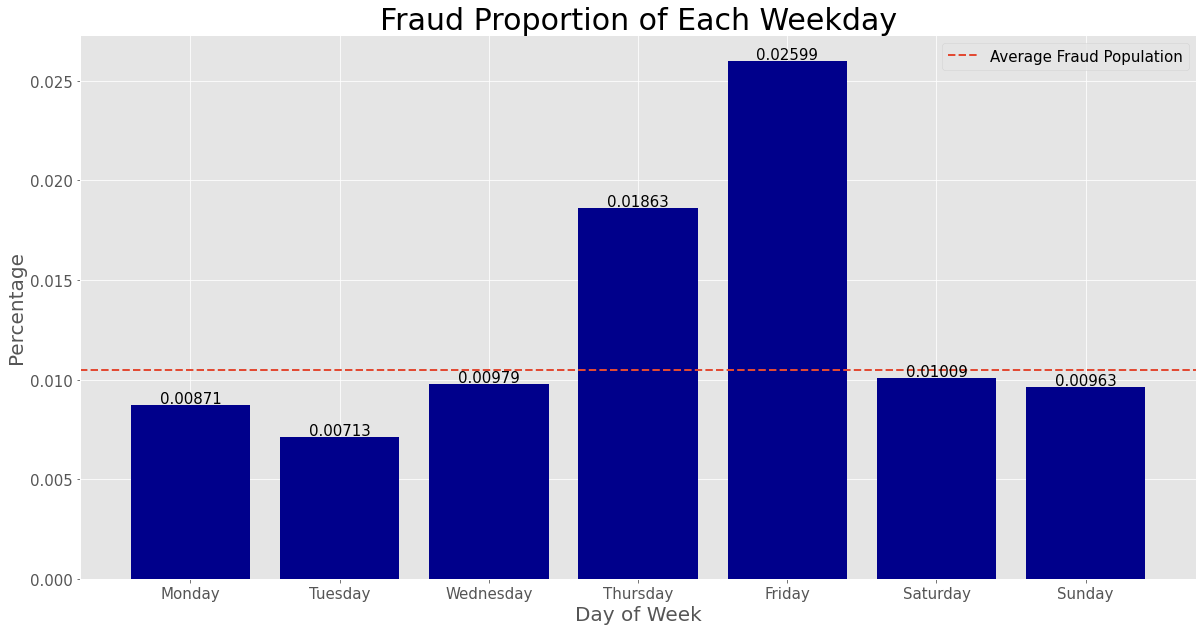

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(data = y_dow,
        x = y_dow.index,
        height = 'Fraud',
        color = 'darkblue'
        )
ax.axhline(y = y_avg, ls = '--', lw = 2, label = 'Average Fraud Population')

for i, v in enumerate(y_dow.index):
  ax.text(v,y_dow.loc[v,'Fraud'] + 0.0001, round(y_dow.loc[v,'Fraud'],5),horizontalalignment='center',fontsize=15)

plt.legend(['Average Fraud Population'], fontsize=15)
plt.xlabel('Day of Week', fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Fraud Proportion of Each Weekday', fontsize=30)

plt.show()

In [ ]:
data.shape

(96397, 14)

In [ ]:
import dataclasses
# Make new entities for variables

data['cardnum_merchnum']=data.Cardnum+data.Merchnum
data['cardnum_merchdes']=data.Cardnum+data['Merch description']
data['cardnum_state']=data.Cardnum+data['Merch state']
data['cardnum_zip']=data.Cardnum+data['Merch zip']
data['merchnum_state']=data.Merchnum+data['Merch state']
data['merchnum_zip']=data.Merchnum+data['Merch zip']
data['cardnum_merchnum_state']=data.Cardnum+data.Merchnum+data['Merch state']
data['cardnum_merchnum_zip']=data.Cardnum+data.Merchnum+data['Merch zip']

In [ ]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',
       'U*_cardnum', 'U*_merchnum', 'Dow', 'Dow_Risk', 'cardnum_merchnum',
       'cardnum_merchdes', 'cardnum_state', 'cardnum_zip', 'merchnum_state',
       'merchnum_zip', 'cardnum_merchnum_state', 'cardnum_merchnum_zip'],
      dtype='object')

In [ ]:
entities=list(data.iloc[:,np.r_[1,3:5,14,15,16:22]].columns)
entities

['Cardnum',
 'Merchnum',
 'Merch description',
 'cardnum_merchnum',
 'cardnum_merchdes',
 'cardnum_state',
 'cardnum_zip',
 'merchnum_state',
 'merchnum_zip',
 'cardnum_merchnum_state',
 'cardnum_merchnum_zip']

In [ ]:
len(entities)

11

In [ ]:
#create entities

df1 = data.copy()
final = data.copy()
df1['check_date'] = df1.Date
df1['check_record'] = df1.Recnum

In [ ]:
#Day since variables
for entity in entities:
  df_l = df1[['Recnum','Date',entity]]
  df_r = df1[['check_record','check_date',entity,'Amount']]
  temp = pd.merge(df_l,df_r,left_on = entity,right_on = entity)
  temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']].groupby('Recnum')[['Date','check_date']].last()
  mapper = (temp1.Date - temp1.check_date).dt.days
  final[entity+'_day_since']=final.Recnum.map(mapper)
  final[entity+'_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days,inplace=True)
  print('\n' + entity + '_day_since ----> Done')
  #frequency and amount variables
  for time in [0,1,3,7,14,30]:
    temp2=temp[(temp.check_date>=(temp.Date - dt.timedelta(time))) & (temp.Recnum>=temp.check_record)][['Recnum',entity,'Amount']]
    col_name=entity+'_count_'+str(time)
    mapper2=temp2.groupby('Recnum')[entity].count()
    final[col_name]=final.Recnum.map(mapper2)
    print(col_name + '--->Done')
    final[entity+'_avg_'+str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
    final[entity+'_max_'+str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
    final[entity+'_med_'+str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
    final[entity+'_total_'+str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
    final[entity+'_actual/avg_'+str(time)] = final['Amount']/final[entity+'_avg_'+str(time)]
    final[entity+'_actual/max_'+str(time)] = final['Amount']/final[entity+'_max_'+str(time)]
    final[entity+'_actual/med_'+str(time)] = final['Amount']/final[entity+'_med_'+str(time)]
    final[entity+'_actual/total_'+str(time)] = final['Amount']/final[entity+'_total_'+str(time)]
    print(entity+'amount variables over past'+str(time)+'--->Done')


Cardnum_day_since ----> Done
Cardnum_count_0--->Done
Cardnumamount variables over past0--->Done
Cardnum_count_1--->Done
Cardnumamount variables over past1--->Done
Cardnum_count_3--->Done
Cardnumamount variables over past3--->Done
Cardnum_count_7--->Done
Cardnumamount variables over past7--->Done
Cardnum_count_14--->Done
Cardnumamount variables over past14--->Done
Cardnum_count_30--->Done
Cardnumamount variables over past30--->Done

Merchnum_day_since ----> Done
Merchnum_count_0--->Done
Merchnumamount variables over past0--->Done
Merchnum_count_1--->Done
Merchnumamount variables over past1--->Done
Merchnum_count_3--->Done
Merchnumamount variables over past3--->Done
Merchnum_count_7--->Done
Merchnumamount variables over past7--->Done
Merchnum_count_14--->Done


<ipython-input-31-5552f18e30ef>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity+'_total_'+str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
<ipython-input-31-5552f18e30ef>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity+'_actual/avg_'+str(time)] = final['Amount']/final[entity+'_avg_'+str(time)]
<ipython-input-31-5552f18e30ef>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Merchnumamount variables over past14--->Done


<ipython-input-31-5552f18e30ef>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper2)


Merchnum_count_30--->Done


<ipython-input-31-5552f18e30ef>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity+'_avg_'+str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
<ipython-input-31-5552f18e30ef>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity+'_max_'+str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
<ipython-input-31-5552f18e30ef>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Merchnumamount variables over past30--->Done


<ipython-input-31-5552f18e30ef>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[entity+'_day_since']=final.Recnum.map(mapper)



Merch description_day_since ----> Done
Merch description_count_0--->Done
Merch descriptionamount variables over past0--->Done
Merch description_count_1--->Done
Merch descriptionamount variables over past1--->Done
Merch description_count_3--->Done
Merch descriptionamount variables over past3--->Done
Merch description_count_7--->Done
Merch descriptionamount variables over past7--->Done
Merch description_count_14--->Done
Merch descriptionamount variables over past14--->Done
Merch description_count_30--->Done
Merch descriptionamount variables over past30--->Done

cardnum_merchnum_day_since ----> Done
cardnum_merchnum_count_0--->Done
cardnum_merchnumamount variables over past0--->Done
cardnum_merchnum_count_1--->Done
cardnum_merchnumamount variables over past1--->Done
cardnum_merchnum_count_3--->Done
cardnum_merchnumamount variables over past3--->Done
cardnum_merchnum_count_7--->Done
cardnum_merchnumamount variables over past7--->Done
cardnum_merchnum_count_14--->Done
cardnum_merchnumamoun

In [ ]:
final.shape

(96397, 627)

In [ ]:
#velocity change variables
for ent in entities:
  for d in ['0','1']:
    for dd in ['7','14','30']:
      final[ent+'_count_'+d+'_by_'+dd] =\
      final[ent+'_count_'+d]/(final[ent+'_count_'+dd]/float(dd))

<ipython-input-33-e9b07424fdd6>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[ent+'_count_'+d+'_by_'+dd] =\


In [ ]:
final.shape

(96397, 693)

In [ ]:
#velocity days since ratio
for ent in entities:
  for d in ['0','1']:
    for dd in ['7','14','30']:
      final[ent+'_vdratio_'+d+'_by_'+dd] =\
      final[ent+'_count_'+d+'_by_'+dd]/(final[ent+'_day_since']+1)

<ipython-input-35-0d6a627f1f02>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[ent+'_vdratio_'+d+'_by_'+dd] =\


In [ ]:
final.shape

(96397, 759)

In [ ]:
#variability
for entity in entities:
  df_l = df1[['Recnum','Date',entity,'Amount']]
  df_r = df1[['check_record','check_date',entity,'Amount']]
  temp = pd.merge(df_l,df_r,left_on=entity,right_on=entity)

  for time in [0,1,3,7,14,30]:
    temp2=temp[(temp.check_date>=(temp.Date-dt.timedelta(time))) & (temp.Recnum>=temp.check_record)][['Recnum','check_record',entity,'Amount_x','Amount_y']]
    temp2['Amount_diff']=temp2['Amount_y']-temp2['Amount_x']

    col_name=entity+'_variability_avg_'+str(time)
    mapper2=temp2.groupby('Recnum')['Amount_diff'].mean()
    final[col_name]=final.Recnum.map(mapper2)
    print(col_name+'--->Done')

    col_name=entity+'_variability_max_'+str(time)
    mapper2=temp2.groupby('Recnum')['Amount_diff'].max()
    final[col_name]=final.Recnum.map(mapper2)
    print(col_name+'--->Done')

    col_name=entity+'_variability_med_'+str(time)
    mapper2=temp2.groupby('Recnum')['Amount_diff'].median()
    final[col_name]=final.Recnum.map(mapper2)
    print(col_name+'--->Done')

    print(entity+'amount variables over past'+str(time)+'--->Done')

<ipython-input-37-3ea16e59242a>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper2)
<ipython-input-37-3ea16e59242a>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper2)
<ipython-input-37-3ea16e59242a>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, 

Cardnum_variability_avg_0--->Done
Cardnum_variability_max_0--->Done
Cardnum_variability_med_0--->Done
Cardnumamount variables over past0--->Done
Cardnum_variability_avg_1--->Done
Cardnum_variability_max_1--->Done
Cardnum_variability_med_1--->Done
Cardnumamount variables over past1--->Done
Cardnum_variability_avg_3--->Done
Cardnum_variability_max_3--->Done
Cardnum_variability_med_3--->Done
Cardnumamount variables over past3--->Done
Cardnum_variability_avg_7--->Done
Cardnum_variability_max_7--->Done
Cardnum_variability_med_7--->Done
Cardnumamount variables over past7--->Done
Cardnum_variability_avg_14--->Done
Cardnum_variability_max_14--->Done
Cardnum_variability_med_14--->Done
Cardnumamount variables over past14--->Done
Cardnum_variability_avg_30--->Done
Cardnum_variability_max_30--->Done
Cardnum_variability_med_30--->Done
Cardnumamount variables over past30--->Done
Merchnum_variability_avg_0--->Done
Merchnum_variability_max_0--->Done
Merchnum_variability_med_0--->Done
Merchnumamount va

In [ ]:
final.shape

(96397, 957)

<ipython-input-39-856c840f1808>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final['amount_cat'] = pd.qcut(final.Amount,q=5,labels=[1,2,3,4,5])


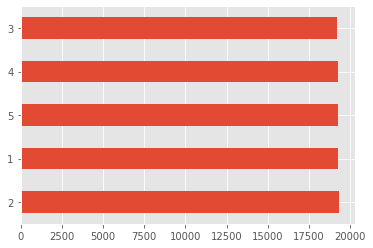

In [ ]:
#amount bins

AMOUNT=True
if AMOUNT:
  final['amount_cat'] = pd.qcut(final.Amount,q=5,labels=[1,2,3,4,5])

  final['amount_cat'].value_counts().plot(kind='barh')
  plt.show()

  qcut_series, qcut_intervals=pd.qcut(final.Amount,q=5,labels=[1,2,3,4,5],retbins=True)
  qcut_series.value_counts()

In [ ]:
final.shape

(96397, 958)

In [ ]:
for ent in entities:
  print(ent)
  for d in ['0','1']:
    for dd in ['7','14','30']:
      final[ent+'_count_'+d+'_by_'+dd+'_sq'] = final[ent+'_count_'+d]/(final[ent+'_count_'+dd])/pow(float(dd),2)

<ipython-input-41-d3347391738f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[ent+'_count_'+d+'_by_'+dd+'_sq'] = final[ent+'_count_'+d]/(final[ent+'_count_'+dd])/pow(float(dd),2)


Cardnum
Merchnum
Merch description
cardnum_merchnum
cardnum_merchdes
cardnum_state
cardnum_zip
merchnum_state
merchnum_zip
cardnum_merchnum_state
cardnum_merchnum_zip


In [ ]:
final.shape

(96397, 1024)

In [ ]:
for i in entities:
  for v in entities:
    if i==v:
      continue
    else:
      df_c=df1[['Recnum','Date',i]]
      df_d=df1[['check_record','check_date',i,v]]
      temp=pd.merge(df_c,df_d,left_on=i,right_on=i)

    for t in [1,3,7,14,30,60]:
      count_day_df=temp[(temp.check_date>=(temp.Date-dt.timedelta(t)))&(temp.Recnum>=temp.check_record)]
      col_name=f'{i}_unique_count_for_{v}_{t}'
      mapper=count_day_df.groupby(['Recnum'])[v].nunique()
      final[col_name]=final.Recnum.map(mapper)



<ipython-input-43-8758e636a526>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final[col_name]=final.Recnum.map(mapper)


In [ ]:
final.shape

(96397, 1684)

In [ ]:
final.to_csv('final data.csv',index=False)

In [ ]:
final = pd.read_csv('final data.csv',converters = {'Merchnum': lambda x:str(x),'Cardnum':lambda x:str(x)})

In [ ]:
final.shape

(96397, 1684)

In [ ]:
#Gas station variable
final['gas_station'] = final['Merch description'].str.contains(' OIL ', case=False, na=False).astype(int)

In [ ]:
final.shape

(96397, 1685)

In [ ]:
final['Date'] = pd.to_datetime(final['Date'])

In [ ]:
final = final.sort_values(['Cardnum', 'Date'])
final.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,cardnum_merchnum_zip_unique_count_for_merchnum_zip_14,cardnum_merchnum_zip_unique_count_for_merchnum_zip_30,cardnum_merchnum_zip_unique_count_for_merchnum_zip_60,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_1,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_3,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_7,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_14,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_30,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_60,gas_station
80801,81127,5142110002,2010-10-12,unknown,X REVERSAL OF CR BAL REF,VA,unknown,P,150.0,0,...,1,1,1,1,1,1,1,1,1,0
16606,16628,5142110081,2010-03-08,unknown,X OFFICE DEPOT #1,unknown,unknown,P,495.9,0,...,1,1,1,1,1,1,1,1,1,0
16778,16801,5142110081,2010-03-08,unknown,X FRANKLIN COVEY,unknown,unknown,P,636.2,0,...,1,1,1,1,1,1,1,1,1,0
89137,89482,5142110081,2010-11-26,2094330000009,FRANKLIN COVEY COMPANY,UT,84119.0,P,636.2,0,...,1,1,1,1,1,1,1,1,1,0
95620,95973,5142110081,2010-12-27,4503082412500,OFFICE DEPOT #1078,WA,98032.0,P,495.9,0,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
# Create a new column called 'Next_Date' that contains the date of the next transaction for each Cardnum group
final['Next_Date'] = final.groupby('Cardnum')['Date'].shift(-1)

# Create a new column called 'Time_Diff' that calculates the time difference between the current transaction and the next transaction for each Cardnum group
final['Time_Diff'] = pd.to_timedelta(final['Next_Date'] - final['Date'])

# Create a new column called 'Next_Zipcode' that contains the Zipcode of the next transaction for each Cardnum group
final['Next_Zipcode'] = final.groupby('Cardnum')['Merch zip'].shift(-1)

# Create a new column called 'Next_State' that contains the Zipcode of the next transaction for each Cardnum group
final['Next_State'] = final.groupby('Cardnum')['Merch state'].shift(-1)

In [ ]:
#create binary variables for subsequent Zipcode and State
final['Different_Zipcode'] = final.apply(lambda x: 0 if x['Merch zip'] == x['Next_Zipcode'] else 1, axis=1)
final['Different_State'] = final.apply(lambda x: 0 if x['Merch state'] == x['Next_State'] else 1, axis=1)

In [ ]:
#drop unneended values from the variable creation steps
final = final.sort_values(['Recnum'])
final = final.drop(columns=['Next_Date','Time_Diff','Next_Zipcode','Next_State'])

In [ ]:
final.shape

(96397, 1687)

In [ ]:
final.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,cardnum_merchnum_zip_unique_count_for_merchnum_zip_60,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_1,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_3,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_7,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_14,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_30,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_60,gas_station,Different_Zipcode,Different_State
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,1,1,1,1,1,1,1,0,0,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,1,1,1,1,1,1,1,0,1,1
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,1,1,1,1,1,1,1,0,1,1
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,...,1,1,1,1,1,1,1,0,0,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,1,1,1,1,1,1,1,0,0,0


In [ ]:
#drop original variables and attributes
final.drop(columns=entities,inplace=True)
final.head()

,Recnum,Date,Merch state,Merch zip,Transtype,Amount,Fraud,U*_cardnum,U*_merchnum,Dow,...,cardnum_merchnum_zip_unique_count_for_merchnum_zip_60,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_1,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_3,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_7,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_14,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_30,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_60,gas_station,Different_Zipcode,Different_State
0,1,2010-01-01,TN,38118.0,P,3.62,0,2.178008,1.000000,Friday,...,1,1,1,1,1,1,1,0,0,0
1,2,2010-01-01,MA,1803.0,P,31.42,0,1.604857,1.001244,Friday,...,1,1,1,1,1,1,1,0,1,1
2,3,2010-01-01,MD,20706.0,P,178.49,0,2.368143,1.025818,Friday,...,1,1,1,1,1,1,1,0,1,1
3,4,2010-01-01,TN,38118.0,P,3.62,0,1.044105,1.000000,Friday,...,1,1,1,1,1,1,1,0,0,0
4,5,2010-01-01,TN,38118.0,P,3.62,0,2.178008,1.000000,Friday,...,1,1,1,1,1,1,1,0,0,0


In [ ]:
final = final.drop(columns=['Date','Merch state','Merch zip', 'Transtype','Amount','Dow'])
final.head()

,Recnum,Fraud,U*_cardnum,U*_merchnum,Dow_Risk,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,...,cardnum_merchnum_zip_unique_count_for_merchnum_zip_60,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_1,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_3,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_7,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_14,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_30,cardnum_merchnum_zip_unique_count_for_cardnum_merchnum_state_60,gas_station,Different_Zipcode,Different_State
0,1,0,2.178008,1.000000,0.025994,0.0,1,3.62,3.62,3.62,...,1,1,1,1,1,1,1,0,0,0
1,2,0,1.604857,1.001244,0.025994,0.0,1,31.42,31.42,31.42,...,1,1,1,1,1,1,1,0,1,1
2,3,0,2.368143,1.025818,0.025994,0.0,1,178.49,178.49,178.49,...,1,1,1,1,1,1,1,0,1,1
3,4,0,1.044105,1.000000,0.025994,0.0,1,3.62,3.62,3.62,...,1,1,1,1,1,1,1,0,0,0
4,5,0,2.178008,1.000000,0.025994,0.0,2,3.62,3.62,3.62,...,1,1,1,1,1,1,1,0,0,0


In [ ]:
#dedup variables
print(final.shape)
final_dedup = final.T.drop_duplicates().T
final_dedup.shape

(96397, 1670)


(96397, 1323)

In [ ]:
#create deduped csv
final_dedup.to_csv('final_dedup1.csv',index=False)

In [ ]:
#check which fields were removed during the dedup
dropped_cols = set(final.columns) - set(final_dedup.columns)

print("Dropped columns:", dropped_cols)

Dropped columns: {'merchnum_zip_unique_count_for_cardnum_merchnum_7', 'merchnum_state_unique_count_for_cardnum_merchnum_state_7', 'Cardnum_unique_count_for_cardnum_merchnum_3', 'cardnum_merchnum_zip_unique_count_for_cardnum_zip_1', 'merchnum_state_unique_count_for_cardnum_merchnum_1', 'cardnum_merchnum_state_unique_count_for_Cardnum_30', 'Cardnum_unique_count_for_cardnum_merchnum_zip_3', 'merchnum_state_unique_count_for_cardnum_state_14', 'cardnum_merchnum_unique_count_for_cardnum_merchnum_state_14', 'cardnum_merchnum_state_unique_count_for_cardnum_merchnum_zip_30', 'Cardnum_unique_count_for_cardnum_merchdes_3', 'Merch description_unique_count_for_cardnum_merchdes_7', 'cardnum_merchnum_state_unique_count_for_cardnum_merchdes_1', 'merchnum_state_unique_count_for_Merchnum_30', 'merchnum_zip_unique_count_for_Merchnum_14', 'Cardnum_unique_count_for_cardnum_merchnum_1', 'merchnum_state_unique_count_for_cardnum_merchnum_zip_1', 'cardnum_merchnum_zip_unique_count_for_cardnum_zip_7', 'merchnum

In [ ]:
count_unique = sum([1 for item in dropped_cols if 'unique_count' in item])
count_nunique = sum([1 for item in dropped_cols if '_nunique' in item])
print(count_unique,count_nunique)

347 0
